## Lab7

### zad1

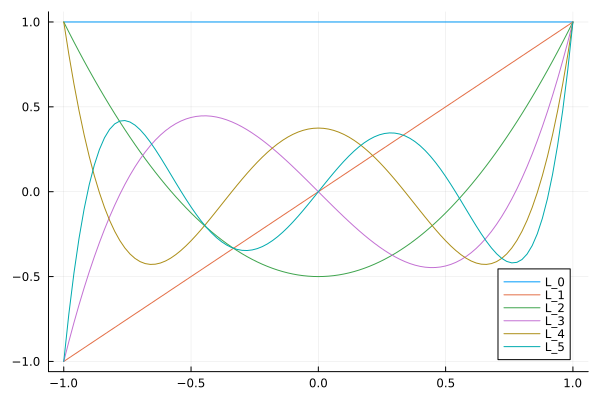

In [68]:
using QuadGK, Polynomials, Plots

xs = collect(-1:0.01:1)
l0 = Polynomial([1])
l1 = Polynomial([0,1])
l2 = 3/2 * l1 * l1 - 1/2 * l0
l3 = 5/3 * l1 * l2 - 2/3 * l1
l4 = 7/4 * l1 * l3 - 3/4 * l2
l5 = 9/5 * l1 * l4 - 4/5 * l3

plot(l0,extrema(xs)...,label="L_0")
plot!(l1,extrema(xs)...,label="L_1")
plot!(l2,extrema(xs)...,label="L_2")
plot!(l3,extrema(xs)...,label="L_3")
plot!(l4,extrema(xs)...,label="L_4")
plot!(l5,extrema(xs)...,label="L_5")


In [69]:
println(roots(l2))
(xp, a) = gauss(Float64,2)
println(xp)
println(roots(l3))
(xp, a) = gauss(Float64,3)
println(xp)
println(roots(l4))
(xp, a) = gauss(Float64,4)
println(xp)

[-0.5773502691896258, 0.5773502691896256]
[-0.5773502691896258, 0.5773502691896258]
[-0.7745966692414834, 0.7745966692414835, 0.0]
[-0.7745966692414834, 0.0, 0.7745966692414834]
[-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
[-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]


Odcięte $x_i$ n-punktowej kwadratury Gaussa z funkcją ważącą $w(x)$ w $[a,b]$ są zerami wielomianu ortogonalnego $\phi_{n}(x)$ dla tego samego przedziału i tej samej funkcji ważącej.

### zad2

In [70]:
function gaussIntegral(k,f)
    (roots, coeffs) = gauss(k)
    return sum(coeffs.*f.(roots))
end

gaussIntegral (generic function with 2 methods)

In [71]:
test = [[if j != i  0 else i end for i in 1:j] for j in 1:10]

for i in 1:10
    poly = Polynomial(test[i])
    integral = gaussIntegral(2,poly)
    expected = 1^length(poly) - ((-1)^length(poly))
    println("Polynomial level: $i Calc: $integral Expected: $expected")
end

Polynomial level: 1 Calc: 1.9999999999999996 Expected: 2
Polynomial level: 2 Calc: 0.0 Expected: 0
Polynomial level: 3 Calc: 2.0 Expected: 2
Polynomial level: 4 Calc: 0.0 Expected: 0
Polynomial level: 5 Calc: 1.1111111111111114 Expected: 2
Polynomial level: 6 Calc: 0.0 Expected: 0
Polynomial level: 7 Calc: 0.5185185185185188 Expected: 2
Polynomial level: 8 Calc: 0.0 Expected: 0
Polynomial level: 9 Calc: 0.2222222222222224 Expected: 2
Polynomial level: 10 Calc: 0.0 Expected: 0


Funkcja przestaje być dokładna przy stopniu wielomianu równym 5. Wynika to z twierdzenia o stopniu dokładności kwadratury Gaussa - jest ona dokładna dla wielomianu o stopniu równym maksymalnie $2n -1$, zatem dla kwadratury równej 2 dokładność kończy się na wielomianie stopnia 3.

### zad3

In [72]:
function gaussIntegral(k, f, a, b)
    (roots, coeffs) = gauss(k)
    x = (b - a) / 2 .* roots .+ (b + a) / 2
    return sum(coeffs .* f.(x)) * (b - a) / 2
end

gaussIntegral (generic function with 2 methods)

In [73]:
test1 = Polynomial([5,2,1])

for i in 1:5
    println("Quadrade: $test1, Interval: [0,4],  Degree: $i, Expected: 57.33 Got: $(gaussIntegral(i,test1,0,4))")
end

Quadrade: 5 + 2*x + x^2, Interval: [0,4],  Degree: 1, Expected: 57.33 Got: 52.0
Quadrade: 5 + 2*x + x^2, Interval: [0,4],  Degree: 2, Expected: 57.33 Got: 57.33333333333332
Quadrade: 5 + 2*x + x^2, Interval: [0,4],  Degree: 3, Expected: 57.33 Got: 57.33333333333333
Quadrade: 5 + 2*x + x^2, Interval: [0,4],  Degree: 4, Expected: 57.33 Got: 57.33333333333334
Quadrade: 5 + 2*x + x^2, Interval: [0,4],  Degree: 5, Expected: 57.33 Got: 57.33333333333332


In [74]:
test2 = sin

for i in 1:5
    println("Quadrade: $test2, Interval: [-2,1], Degree: $i, Expected: 0.95645, Got: $(gaussIntegral(i, test2, -2, 1))")
end

Quadrade: sin, Interval: [-2,1], Degree: 1, Expected: 0.95645, Got: -1.438276615812609
Quadrade: sin, Interval: [-2,1], Degree: 2, Expected: 0.95645, Got: -0.9318009460369654
Quadrade: sin, Interval: [-2,1], Degree: 3, Expected: 0.95645, Got: -0.9569345480422715
Quadrade: sin, Interval: [-2,1], Degree: 4, Expected: 0.95645, Got: -0.9564441226891622
Quadrade: sin, Interval: [-2,1], Degree: 5, Expected: 0.95645, Got: -0.95644917439527


In [75]:
test3(x) = exp(-x / 2)

for i in 1:5
    println("Quadrade: exp(-x/2), Interval: [-5,10], Degree: $i, Expected: 24.35, Got: $(gaussIntegral(i, test3, -5, 10))")
end

Quadrade: exp(-x/2), Interval: [-5,10], Degree: 1, Expected: 24.35, Got: 4.297571952902851
Quadrade: exp(-x/2), Interval: [-5,10], Degree: 2, Expected: 24.35, Got: 18.97356108446982
Quadrade: exp(-x/2), Interval: [-5,10], Degree: 3, Expected: 24.35, Got: 23.774183556286765
Quadrade: exp(-x/2), Interval: [-5,10], Degree: 4, Expected: 24.35, Got: 24.317459279178387
Quadrade: exp(-x/2), Interval: [-5,10], Degree: 5, Expected: 24.35, Got: 24.35023954489256


### zad4

In [76]:
fun = Polynomial([10,5,4])

println("Function: $(fun) Interval: [0,10]")
println("Expected: 1683.3 Got: $(quadgk(fun,0,10)[1])")

Function: 10 + 5*x + 4*x^2 Interval: [0,10]
Expected: 1683.3 Got: 1683.333333333333


In [77]:
fun_gauss(x) = 1/sqrt(2*pi)*exp((-x^2)/2)

println("Function: $(fun_gauss) Interval: [-inf,inf]")
println("Expected: 1 Got: $(quadgk(fun_gauss,-Inf,Inf)[1])")

Function: fun_gauss Interval: [-inf,inf]
Expected: 1 Got: 1.0000000000032583


### zad5

In [78]:
function prostokaty(f, a, b, n)
    h = (b-a)/n
    value = 0
    for i in 1:n
        value += f(a + (i-0.5) * h) 
    end
    return value * h
end

function trapezy(f, a, b, n)
    h = (b - a) / n
    value = 0
    for j in 1:n
        val1 = f(a + (j - 1) * h)
        val2 = f(a + j * h)
        value += (val1 + val2)
    end
    value *= h / 2
    return value
end

function simpson(f, a, b, n)
    value  = 0
    st = 0
    h = (b-a)/n
    for i in 1:n
        val1 = f(a + (i - 1) * h)
        val2 = f(a + (i-0.5) * h) 
        val3 = f(a + i * h)
        
        value += h / 6 * (val1 + val3 + 4 * val2)
    end

    return value
end


simpson (generic function with 1 method)

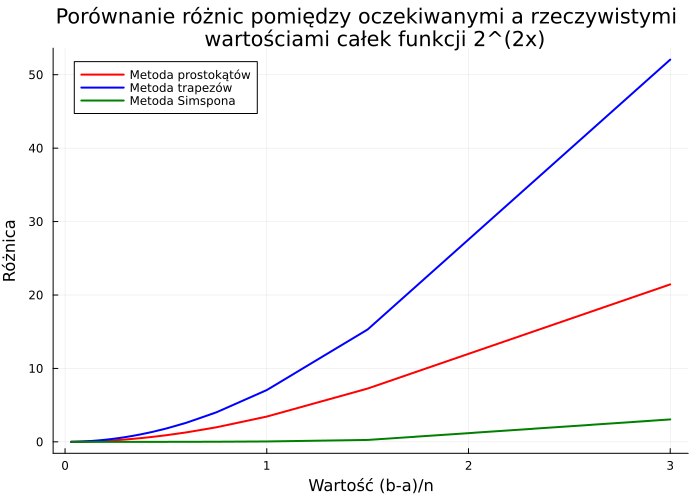

In [79]:
fun_wyk(x) = 2^(2*x)
expected = 45.445

xs1 = Vector{Float64}()
prostokaty_diff1 = Vector{Float64}()
trapezy_diff1 = Vector{Float64}()
simpson_fiff1 = Vector{Float64}()
n = 1

while n <= 100
    append!(xs1, 3/n)
    append!(prostokaty_diff1, abs(expected-prostokaty(fun_wyk,0,3,n)))
    append!(trapezy_diff1, abs(expected-trapezy(fun_wyk,0,3,n)))
    append!(simpson_fiff1, abs(expected-simpson(fun_wyk,0,3,n)))
    n += 1
end

plot(
    size=(700, 500),
    xs1,
    [prostokaty_diff1, trapezy_diff1, simpson_fiff1],
    label=["Metoda prostokątów" "Metoda trapezów" "Metoda Simspona"],
    linewidth=2,
    color = ["red" "blue" "green"],
    title="Porównanie różnic pomiędzy oczekiwanymi a rzeczywistymi \n wartościami całek funkcji 2^(2x)",
    xlabel="Wartość (b-a)/n",
    ylabel="Różnica",
)

2.7554161134268193e-16


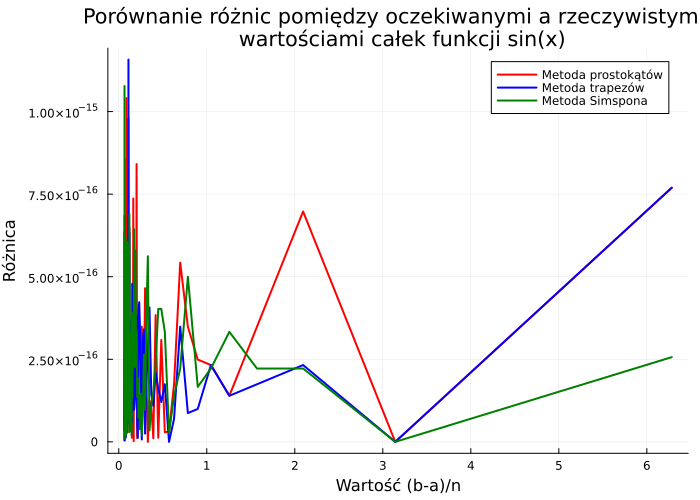

In [80]:
fun_sin = sin
expected2 = 0

xs2 = Vector{Float64}()
prostokaty_diff2 = Vector{Float64}()
trapezy_diff2 = Vector{Float64}()
simpson_fiff2 = Vector{Float64}()
n = 1

while n <= 100
    append!(xs2, 2*pi/n)
    append!(prostokaty_diff2 ,abs(expected2-prostokaty(fun_sin,0,2*pi,n)))
    append!(trapezy_diff2, abs(expected2-trapezy(fun_sin,0,2*pi,n)))
    append!(simpson_fiff2,abs(expected2-simpson(fun_sin,0,2*pi,n)))
    n += 1
end

println(prostokaty(fun_sin,0,2*pi,100))

plot(
    size=(700, 500),
    xs2,
    [prostokaty_diff2, trapezy_diff2, simpson_fiff2],
    label=["Metoda prostokątów" "Metoda trapezów" "Metoda Simspona"],
    linewidth=2,
    color = ["red" "blue" "green"],
    title="Porównanie różnic pomiędzy oczekiwanymi a rzeczywistymi \n wartościami całek funkcji sin(x)",
    xlabel="Wartość (b-a)/n",
    ylabel="Różnica",
)

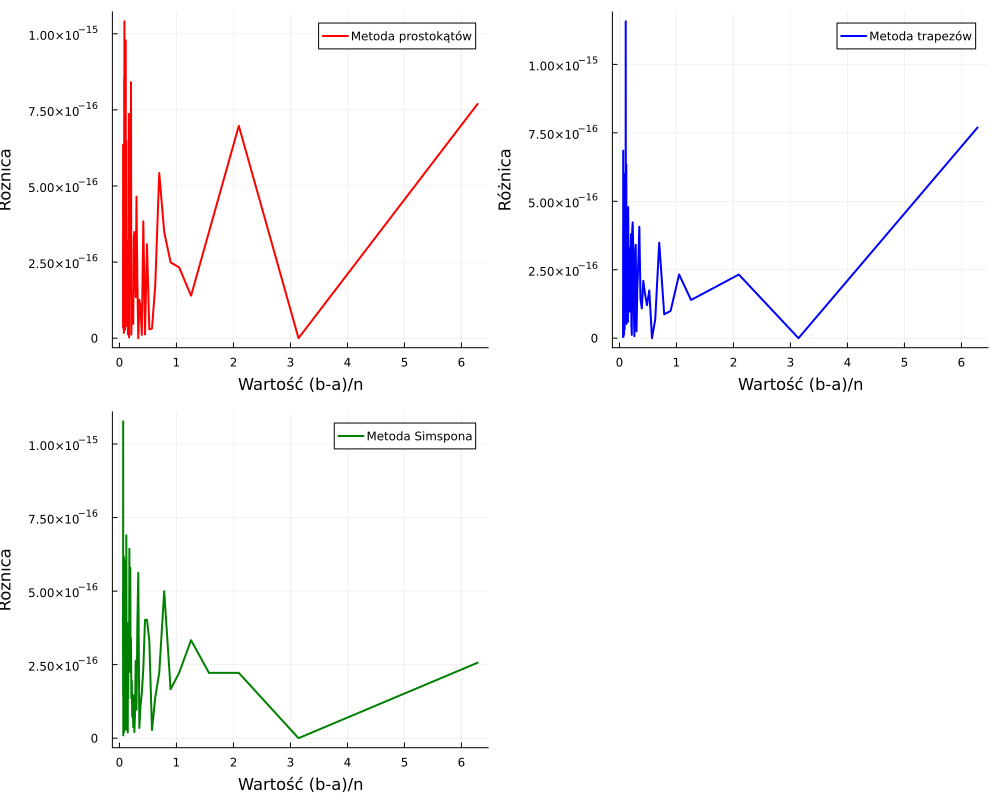

In [81]:
plot(
    size=(1000, 800),
    xs2,
    [prostokaty_diff2, trapezy_diff2, simpson_fiff2],
    label=["Metoda prostokątów" "Metoda trapezów" "Metoda Simspona"],
    linewidth=2,
    color = ["red" "blue" "green"],
    layout = (3),
    xlabel="Wartość (b-a)/n",
    ylabel="Różnica",
)